## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#### 1. Mounting drive

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Importing required Libraries

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')
%matplotlib inline

#### 3.Creating DataFrame and Exploring its DataTypes

In [217]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [218]:
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [219]:
airbnb_df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [220]:
airbnb_df.dtypes.reset_index().rename(columns={'index':'Columns',0:'DataTypes'})

,Columns,DataTypes
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,object
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,int64


#### 4. Checking for null values

In [221]:
# Percent of null values in Columns.

for column in airbnb_df.columns:
  print(f'Percent of null values in {column} is : {np.round(airbnb_df[column].isnull().mean()*100,2)} %')

Percent of null values in id is : 0.0 %
Percent of null values in name is : 0.03 %
Percent of null values in host_id is : 0.0 %
Percent of null values in host_name is : 0.04 %
Percent of null values in neighbourhood_group is : 0.0 %
Percent of null values in neighbourhood is : 0.0 %
Percent of null values in latitude is : 0.0 %
Percent of null values in longitude is : 0.0 %
Percent of null values in room_type is : 0.0 %
Percent of null values in price is : 0.0 %
Percent of null values in minimum_nights is : 0.0 %
Percent of null values in number_of_reviews is : 0.0 %
Percent of null values in last_review is : 20.56 %
Percent of null values in reviews_per_month is : 20.56 %
Percent of null values in calculated_host_listings_count is : 0.0 %
Percent of null values in availability_365 is : 0.0 %


#### 5.Handling NaN values Spliting the dataset into 2 parts:
* reviewed dataset having non-null review columns
* non-reviewed dataset having null review columns

In [222]:
# 2 empty lists to capture the ids for the nan values of host_name and name columns respectively
id_for_nan_host_name = []
for val in airbnb_df.loc[airbnb_df.host_name.isna()]['host_id']:
  id_for_nan_host_name.append(val)

id_for_nan_name = []
for val in airbnb_df.loc[airbnb_df.name.isna()]['id']:
  id_for_nan_name.append(val)


In [223]:
def name_finder(id,name,id_list):
  '''This function checks if the id for name with nan value has any repeatation in other part of the the name column
    with some legitimate names. '''

  for i in range(airbnb_df.shape[0]):
    if id[i] in id_list:
      if name[i] != np.nan:
        print(name[i])
      else:
        pass
    else:
      pass

In [224]:
name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_host_name)
name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_name)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


We find that the nan values of the column name and host_name doesn't have any legitimate name mentioned in the dataset which we tried seaching using their ids and host_ids respectively.

Hence, we tried to replace those nan values with 'no name'.

In [225]:
# Handilng NaN values from Name and host_name column

# airbnb_df[['name','host_name']].replace(np.nan,'no name',inplace=True)
airbnb_df[['name','host_name']] = airbnb_df[['name','host_name']].fillna('no name')

In [226]:
# Converting the time string  to datetime format

airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [227]:
# Splitting the dataset into reviewed_df for non null review data and non_reviewed_df for null review values.

reviewed_df = airbnb_df.loc[~airbnb_df.last_review.isna() & ~airbnb_df.reviews_per_month.isna()]
reviewed_df.reset_index().drop('index',axis=1,inplace=True)

non_reviewed_df = airbnb_df.loc[airbnb_df.last_review.isna() & airbnb_df.reviews_per_month.isna()]
non_reviewed_df.reset_index().drop('index',axis=1,inplace=True)

In [228]:
# Replacing nan values of last_review and review_per_month of non_reviewed_df with 0. As we will analysing other aspects of for set.
non_reviewed_df[['last_review','reviews_per_month']] = non_reviewed_df[['last_review','reviews_per_month']].fillna(0) 

In [229]:
reviewed_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1


In [230]:
non_reviewed_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0,0.0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0,0.0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0,0.0,1,365


In [231]:
reviewed_df.last_review.dt.year.value_counts()

2019    25209
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: last_review, dtype: int64

# Pratheek T M 

## Primary Objective(1) : What can we learn about different hosts and areas?  

### As categorical column 'id' doesn't have any null values, we can proceed to solve our Primary Objective by referring to column 'id'.
### Let's check whether each id in the given data is unique.
### If not, we'll have to drop those duplicates of particular id's from in the data.

In [232]:
if(len(airbnb_df[:]) == airbnb_df['id'].nunique()):
  print('Each ID is unique')
else:
  print("There are duplicates of few ID's")

Each ID is unique


## Secondary Objective I : Number of Places present in each neighbourhood group of NYC

In [233]:
# Create a list of unique neighbourhood groups
neighbourhood_group_list = list(airbnb_df['neighbourhood_group'].unique())
neighbourhood_group_list

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [234]:
# Additional features for Graphs
IPython_default = plt.rcParams.copy()
plt.rc('axes', facecolor = '#e6e6e6', edgecolor = 'none', axisbelow = True, grid = True)
plt.rc('grid', color = 'w', linestyle = 'solid')
plt.rc('patch', edgecolor = '#e6e6e6')
plt.rc('lines', linewidth = 2)

No handles with labels found to put in legend.


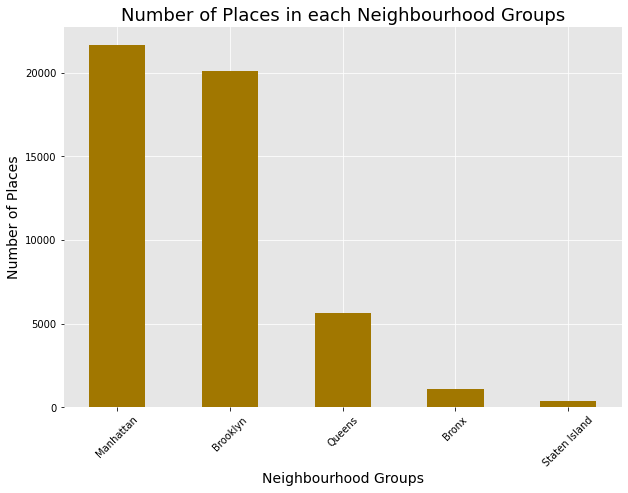

In [235]:
# Counting the number of places present in each Neighbourhood Group and then plotting a graph to depict the distribution.
lst = []
for group in neighbourhood_group_list:
  host_count = airbnb_df[airbnb_df['neighbourhood_group'] == group]['id'].count()
  lst.append([group,host_count])
neighbourhood_group_df = pd.DataFrame(lst, columns=['lst_of_neighbourhood_groups','number of places'], index=neighbourhood_group_list).sort_values('number of places', ascending = False)
plt.rcParams['figure.figsize'] = (10, 7)
plt.bar(neighbourhood_group_df['lst_of_neighbourhood_groups'], neighbourhood_group_df['number of places'], color = '#a17700', width = 0.50)
plt.title('Number of Places in each Neighbourhood Groups',fontsize = 18)
plt.xlabel('Neighbourhood Groups',fontsize = 14)
plt.ylabel('Number of Places',fontsize = 14)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend().remove()

## Observations
### -> The above graph depicts the distribution of Properties over different Neighbourhood Groups.

### -> We can clearly see that Manhatten is hosting most number of Properties, while Brooklyn being in the second place.

## Secondary Objective 2 : Distribution of different kinds of room in each Neighbourhood Group

In [236]:
# Creating a list of different Room types offered on AIRBNB throughout NewYork City 
room_type_list = list(airbnb_df['room_type'].unique())

In [237]:
# Counting each type of Rooms distributed over different Nieghbourhood Groups of NewYork City. 
list_of_entireHomes = []
for group in neighbourhood_group_list:
  ehs = airbnb_df[(airbnb_df['neighbourhood_group'] == group) & (airbnb_df['room_type'] == room_type_list[1])]['id'].count()
  list_of_entireHomes.append([group,ehs])
number_of_EHs = pd.DataFrame(list_of_entireHomes, columns=['list_of_neighbourhood_groups','number_of_entireHomes'], index=neighbourhood_group_list).sort_values('number_of_entireHomes', ascending = False)
print(f'Number of Entire Homes/Apt in each Neighbourhood Groups : \n')
display(number_of_EHs), print('\n')

list_of_privateRooms = []
for group in neighbourhood_group_list:
  prs = airbnb_df[(airbnb_df['neighbourhood_group'] == group) & (airbnb_df['room_type'] == room_type_list[0])]['id'].count()
  list_of_privateRooms.append([group,prs])
number_of_PRs = pd.DataFrame(list_of_privateRooms, columns=['list_of_neighbourhood_groups','number_of_privateRooms'], index=neighbourhood_group_list).sort_values('number_of_privateRooms', ascending = False)
print(f'Number of Private Rooms in each Neighbourhood Groups : \n')
display(number_of_PRs), print('\n')

list_of_sharedRooms = []
for group in neighbourhood_group_list:
  srs = airbnb_df[(airbnb_df['neighbourhood_group'] == group) & (airbnb_df['room_type'] == room_type_list[2])]['id'].count()
  list_of_sharedRooms.append([group,srs])
number_of_SRs = pd.DataFrame(list_of_sharedRooms, columns=['list_of_neighbourhood_groups','number_of_sharedRooms'], index=neighbourhood_group_list).sort_values('number_of_sharedRooms', ascending = False)
print('Number of Shared Rooms in each Neighbourhood Groups : \n')
display(number_of_SRs)

Number of Entire Homes/Apt in each Neighbourhood Groups : 



,list_of_neighbourhood_groups,number_of_entireHomes
Manhattan,Manhattan,13199
Brooklyn,Brooklyn,9559
Queens,Queens,2096
Bronx,Bronx,379
Staten Island,Staten Island,176




Number of Private Rooms in each Neighbourhood Groups : 



,list_of_neighbourhood_groups,number_of_privateRooms
Brooklyn,Brooklyn,10132
Manhattan,Manhattan,7982
Queens,Queens,3372
Bronx,Bronx,652
Staten Island,Staten Island,188




Number of Shared Rooms in each Neighbourhood Groups : 



,list_of_neighbourhood_groups,number_of_sharedRooms
Manhattan,Manhattan,480
Brooklyn,Brooklyn,413
Queens,Queens,198
Bronx,Bronx,60
Staten Island,Staten Island,9


Text(0, 0.5, 'Number of Different Room Types')

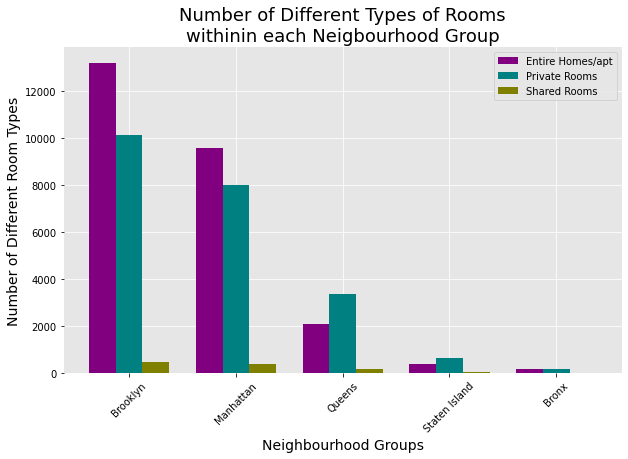

In [238]:
# Plotting the above data to depict the distribution over each Neighbourhood Group
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = np.arange(len(neighbourhood_group_list))
bar3 = plt.subplot()
plt.bar(x_axis - 0.25,  number_of_EHs['number_of_entireHomes'], width = 0.25, label = 'Entire Homes/apt', color = '#800080')
plt.bar(x_axis , number_of_PRs['number_of_privateRooms'], width = 0.25, label = 'Private Rooms', color = '#008080')
plt.bar(x_axis + 0.25, number_of_SRs['number_of_sharedRooms'], width = 0.25, label = 'Shared Rooms', color = '#808000')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = neighbourhood_group_list, fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 10})
bar3.set_title('Number of Different Types of Rooms\nwithinin each Neigbourhood Group', fontsize = 18)
bar3.set_xlabel('Neighbourhood Groups', fontsize = 14)
bar3.set_ylabel('Number of Different Room Types', fontsize = 14)

## Obsevations
### -> The above multi-graph shows the distribution of different Types of Rooms over different Neighbourhood Groups.

### -> We can see that Customers who seek AIRBNB for places ususally prefer either Entire Home/Apartments or Private Rooms over shared rooms. In other words AIRBNB offers more places that aid the privacy together with affordability for the customers.

### -> We can also see that Brooklyn and Manhatten are most preferred Neighbourhood Groups to have an accommodation overall.

## Secondary Objective 3 : Top Bussiest Place Types

In [239]:
# Sorting All Reviewed rows according to reviews per month and assigning top 100 of this dataframe to a variable.
sorted_reviewed = reviewed_df.sort_values('reviews_per_month', ascending = False)[:100].reset_index()

Text(0.5, 1.0, 'Frequency of Top 100 bussiest Properties\nwith respect to their Room Types')

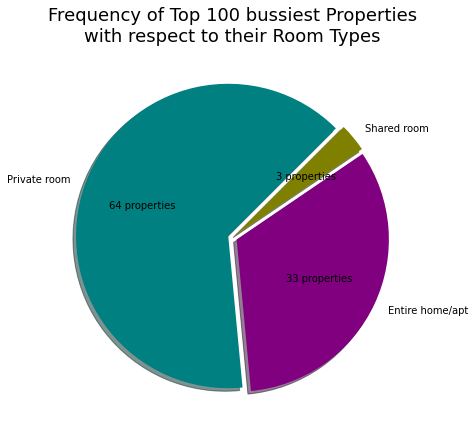

In [240]:
# Counting each type of rooms within Top 100 Bussiest places
top_privateRooms_count = sorted_reviewed[sorted_reviewed['room_type'] == room_type_list[0]]['id'].count()
top_entireHomes_count = sorted_reviewed[sorted_reviewed['room_type'] == room_type_list[1]]['id'].count()
top_sharedRooms_count = sorted_reviewed[sorted_reviewed['room_type'] == room_type_list[2]]['id'].count()
list_of_counts = [top_privateRooms_count, top_entireHomes_count, top_sharedRooms_count]
plt.rcParams['figure.figsize'] = (7,7)
xp = [0.03,0.03,0.03]
plt.pie(list_of_counts, labels = room_type_list, colors = ['#008080','#800080', '#808000'], autopct = '%.0f properties', explode = xp,shadow = True, startangle = 45)
plt.title('Frequency of Top 100 bussiest Properties\nwith respect to their Room Types', fontsize = 18 )

## Observation
### -> Above Graph depects the Frequency of different room types for top 100 Bussiest Places

### -> We can see that Private Rooms the are most bussiest and Shared rooms are the least.

## Secondary Objective 4 : Distribution of different types of Rooms for each Neighbourhoods.

In [241]:
# Creating a list of Neighbourhoods.
neighbourhood_list = list(airbnb_df['neighbourhood'].unique())
number_of_neighbourhoods = airbnb_df['neighbourhood'].nunique()
print(f'Number of total Neighbourhoods in NYC is {number_of_neighbourhoods}')
print(f'List of all Neighbourhoods in NYC : {neighbourhood_list}')

Number of total Neighbourhoods in NYC is 221
List of all Neighbourhoods in NYC : ['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope', 'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side', 'Prospect Heights', 'Washington Heights', 'Woodside', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George', 'Highbridge', 'Financial District', 'Ridgewood', 'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo', 'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island', 'Greenwich Village', 'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point', 'Eastche

In [242]:
# Counting number Places in each Neighbourhood. 
lst1 = []
for area in neighbourhood_list:
  id_count = airbnb_df[airbnb_df['neighbourhood'] == area]['id'].count()
  lst1.append([area,id_count])
neighbourhood_df = pd.DataFrame(lst1, columns=['list_of_neighbourhoods','number_of_places'])
sorted_ndf = neighbourhood_df.sort_values('number_of_places', ascending = False).reset_index()
print('Top 10 most preferred neighbourhoods for any kind of stay are : \n')
display(sorted_ndf.head(10))

Top 10 most preferred neighbourhoods for any kind of stay are : 



,index,list_of_neighbourhoods,number_of_places
0,12,Williamsburg,3920
1,6,Bedford-Stuyvesant,3714
2,2,Harlem,2658
3,21,Bushwick,2465
4,8,Upper West Side,1971
5,7,Hell's Kitchen,1958
6,19,East Village,1853
7,28,Upper East Side,1798
8,15,Crown Heights,1564
9,1,Midtown,1545


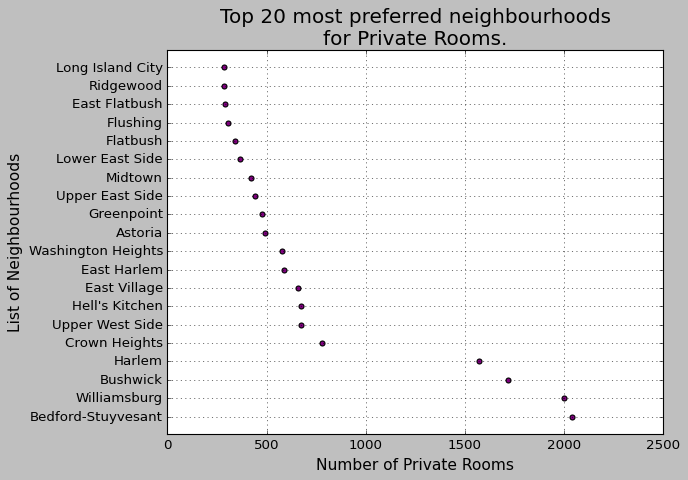

In [243]:
# Counting number of Private Rooms in each Neighbourhood.
privateRooms_in_areas = []
for area in neighbourhood_list:
  prs = airbnb_df[(airbnb_df['neighbourhood'] == area) & (airbnb_df['room_type'] == room_type_list[0])]['id'].count()
  privateRooms_in_areas.append([area,prs])
privateRooms_areasdf = pd.DataFrame(privateRooms_in_areas, columns=['list_of_neighbourhoods','number_of_privateRooms'], index=neighbourhood_list)
sorted_prdf = privateRooms_areasdf.sort_values('number_of_privateRooms', ascending = False)
plt.rcParams['figure.figsize'] = (7, 6)
plt.style.use('classic')
bar_ehs = plt.scatter(sorted_prdf['number_of_privateRooms'].head(20), sorted_prdf['list_of_neighbourhoods'].head(20), c = '#800080')
plt.title('Top 20 most preferred neighbourhoods\nfor Private Rooms.', fontsize = 18)
plt.xlabel('Number of Private Rooms', fontsize = 14)
plt.ylabel('List of Neighbourhoods', fontsize = 14)
plt.grid()

### -> The above Graph depicts the top 10 Neighbourhoods having more number Private rooms.

## Probable Reasons are :

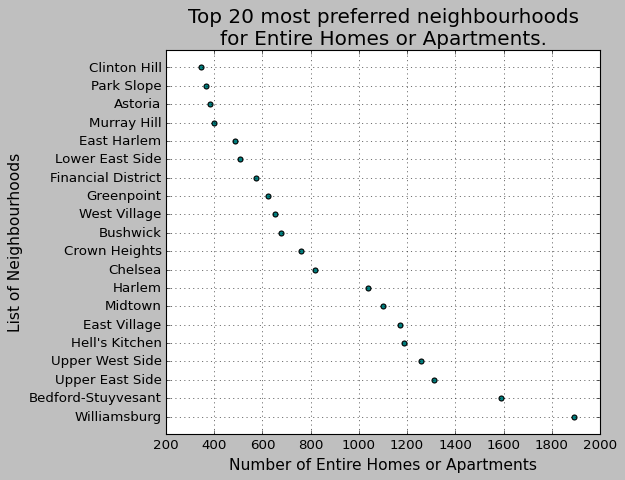

In [244]:
# Counting number of Homes or Apartments in each Neighbourhood.
entireHomes_in_areas = []
for area in neighbourhood_list:
  ehs = airbnb_df[(airbnb_df['neighbourhood'] == area) & (airbnb_df['room_type'] == room_type_list[1])]['id'].count()
  entireHomes_in_areas.append([area,ehs])
entireHomes_areasdf = pd.DataFrame(entireHomes_in_areas, columns=['list_of_neighbourhoods','number_of_entireHomes'], index=neighbourhood_list)
sorted_ehdf = entireHomes_areasdf.sort_values('number_of_entireHomes', ascending = False)
plt.rcParams['figure.figsize'] = (7, 6)
bar_ehs = plt.scatter(sorted_ehdf['number_of_entireHomes'].head(20), sorted_ehdf['list_of_neighbourhoods'].head(20), c = '#008080')
plt.title('Top 20 most preferred neighbourhoods\nfor Entire Homes or Apartments.', fontsize = 18)
plt.xlabel('Number of Entire Homes or Apartments', fontsize = 14)
plt.ylabel('List of Neighbourhoods', fontsize = 14)
plt.grid()

### -> The above Graph depicts the top 10 Neighbourhoods having more number Homes or Apartments.
## Probable Reasons are :

## Secondary Objective 5 : Number of Existing Places per each Year in Different Neighbourhood Groups of NYC.

In [245]:
correlation_val = round(reviewed_df['number_of_reviews'].corr(reviewed_df['reviews_per_month']),2)
print(f"Correlation between columns 'number_of_reviews' and 'reviews_per_month' is {correlation_val}")

Correlation between columns 'number_of_reviews' and 'reviews_per_month' is 0.55


# Note :
### Since the correlation between columns 'number_of_reviews' and 'reviews_per month' is good, we're assuming that the data in  column 'reviews_per_month' as 'number of reviews' a property received over it's lifetime divided by total number of months that property is existing from. 
### With this assumption we're creating two columns : 'duration' and 'possible_year_of_start'

In [246]:
# Creating a DataFrame which contains the Probable Duration and Possible Year of Start
# in addition to all the data exists in Reviewed DF  
temp_disdf = reviewed_df.copy()
temp_disdf['duration'] = round((temp_disdf['number_of_reviews']/temp_disdf['reviews_per_month']) / 12)
temp_disdf['possible_year_of_start'] = temp_disdf['last_review'].dt.year - temp_disdf['duration']
temp_disdf['possible_year_of_start'] = pd.to_datetime(temp_disdf['possible_year_of_start'], format = '%Y').dt.year

In [247]:
# Plotting the Number of Places per Year
list_of_placecount = []
for s_year in list(range(2008,2020)):
  place_count = temp_disdf[(temp_disdf['last_review'].dt.year >= s_year) & (temp_disdf['possible_year_of_start'] <= s_year)]['id'].count()
  list_of_placecount.append([s_year, place_count])
places_by_yeardf = pd.DataFrame(list_of_placecount, columns = ['Year', 'Number of Active Places'])

### Next, we're counting all the properties with 
###(i) **'last review year' greater than the desired year** 
###(ii) **'possible year of start' lesser than the desired year**
### as Properties Existing in that particular year
###('desired year' is from 2008 to 2019)



In [248]:
# Finding the Number of Places for each Nieghbourhood group Year by Year
dct3 = {}
for group in neighbourhood_group_list:
  lst3 = []
  for year in list(range(2008, 2020)):
    count = temp_disdf[(temp_disdf['neighbourhood_group'] == group) 
                  & (temp_disdf['last_review'].dt.year >= year)        
                  & (temp_disdf['possible_year_of_start'] <= year)]['id'].count()  
    lst3.append(count)
  dct3.update({group : lst3})
year_disdf = pd.DataFrame(dct3, index=list(range(2008,2020)))

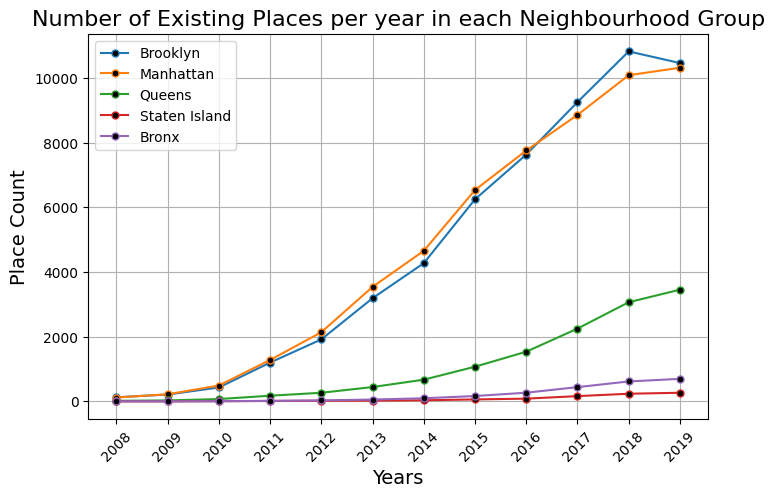

In [249]:
# Plotting the Distribution.
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)
year_disdf['Brooklyn'].plot(marker = 'o', markerfacecolor = 'black', markersize = 5)
year_disdf['Manhattan'].plot(marker = 'o', markerfacecolor = 'black', markersize = 5)
year_disdf['Queens'].plot(marker = 'o', markerfacecolor = 'black', markersize = 5)
year_disdf['Staten Island'].plot(marker = 'o', markerfacecolor = 'black', markersize = 5)
year_disdf['Bronx'].plot(marker = 'o', markerfacecolor = 'black', markersize = 5)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Place Count', fontsize = 14)
plt.title('Number of Existing Places per year in each Neighbourhood Group', fontsize = 16)
plt.locator_params(axis="x", nbins=22)
plt.xticks(rotation = 45, fontsize = 10)
plt.grid()
plt.legend(loc = 'upper left')

## Observations
### -> Above Graph depicts the Frequency of Distribution of Open Places for different Neighbourhood Groups over the Years

### -> We can clearly see that Brooklyn and Manhatten have got simoultaneous increase in demand for accommodations as the years have passed.

# Custom Query : Hi, Myself Riyan Mascarenhas from India, l've been appointed as an Assistant Professor in Columbia University in New York City.

# Since, I need time to settle down in the neighborhood, I'm planning to go for renting a home/apartment for an year or two.

# Can you please suggest me some place names in or near the neighborhood? 

#Solution
### -> We can answer this quary with the **Geographical location** of Required Landmark and assuming the maximum walkable distance is less than **2 Kilometers** from the Required Landmark.

### -> We need to consider Price, Type of the Place and Availability while suggesting a list of Preferable Places.

### -> Here we're considering all Properties with,
### (i) Price lesser than the mean of all prices.
### (ii) Availability greater than 120 days a year.
### (iii) Room Type is Entire Home/Apartments

In [250]:
# Importing Geocoder library.
import geopy
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

In [251]:
# Finding the Geolocation of Required Landmark.
loc = 'Columbia University'
geolocator = Nominatim(user_agent="my_request")
location = geolocator.geocode(loc)
lat0 = location.latitude
long0 = location.longitude
print(f' Geolocation of Required Landmark is {lat0,long0}')

 Geolocation of Required Landmark is (40.8176657, -73.95851439291599)


In [252]:
# Using 'geodesic from geopy' for finding all those places which are at a distance of 'less than 2 kilometers' from Required Landmark
# also counting them.
required_df = pd.DataFrame()
for elem in range(airbnb_df['id'].size):
  if geodesic((airbnb_df.iloc[elem, 6], airbnb_df.iloc[elem, 7]),(lat0,long0)).km < 2:
    required_df = required_df.append(airbnb_df[(airbnb_df['latitude'] == airbnb_df.iloc[elem, 6]) 
                                                      &(airbnb_df['longitude'] == airbnb_df.iloc[elem, 7])])
required_df.reset_index()
required_size = required_df['id'].size
print(f'There are totally {required_size} Places near {loc}')

There are totally 3242 Places near Columbia University


In [253]:
# Finding the list of Preferable Places and sorting them according to Price and Availability.
place_listdf = pd.DataFrame(required_df[((required_df['price'] > 10) & (required_df['price'] <= required_df['price'].mean()))
                                      & (required_df['availability_365'] > 120) 
                                      & (required_df['room_type'] == room_type_list[1])])
sorted_place_listdf = place_listdf.sort_values(['price','availability_365'], ascending =[True,False]).reset_index()
# sorted_place_listdf.head(sorted_place_listdf['id'].size)

In [254]:
# Printing the name of top 20 most Preferable Places with, Price, Availability and corresponding Distances from Required Landmark.
print('Top 20 most Preferable PLaces are : \n\n')
some_df = pd.DataFrame(columns = ['name', 'price', 'distance', 'availability', 'latitude', 'longitude'])
for elem in range(20):
  lat1 = sorted_place_listdf.iloc[elem,7]
  long1 = sorted_place_listdf.iloc[elem,8]
  name = sorted_place_listdf.iloc[elem,2]
  price = sorted_place_listdf.iloc[elem,10]
  distance = round(geodesic((sorted_place_listdf.iloc[elem, 7], sorted_place_listdf.iloc[elem, 8]),(lat0,long0)).km, 2)
  availability = sorted_place_listdf.iloc[elem,16]
  # print(f'{elem+1} Name : {name}, Price : {price} $, Availability : {availability}, Distance : {distance} km  \n')
  some_df = some_df.append({'name' : name, 'price' : price, 'distance' : distance, 'availability' : availability, 'latitude' : lat1, 'longitude' : long1}, ignore_index = True)
display(some_df)

Top 20 most Preferable PLaces are : 




,name,price,distance,availability,latitude,longitude
0,Cozy+Sunny 2 bedroom apt. close to Central Park,49,1.25,279,40.80719,-73.95303
1,Lovely 1B1B Apt in UWS Manhattan,60,0.51,157,40.81847,-73.95259
2,Wonderful Large 1 bedroom,75,0.50,362,40.82135,-73.95521
3,Cozy Studio NYC getaway,75,1.83,361,40.81662,-73.93687
4,"Geek-Chic Full Apt in Sugar Hill, Manhattan!",77,1.86,188,40.83088,-73.94500
5,LUX Studio 10 mins to Central Park!!,78,1.73,208,40.81658,-73.93800
6,Sunny one bedroom for July-Aug,80,1.19,311,40.82693,-73.95142
7,"Affordable, Private, Simple & Clean NYC Flat!",80,1.70,258,40.82029,-73.93861
8,Full-Service Studio Apt in Brownstone/Townhouse,80,1.07,193,40.81726,-73.94583
9,Charming Harlem Apartment,80,1.88,189,40.82964,-73.94271


In [255]:
# Map of the most preferable places.
dict_latlong = {'latitude':lat0,'longitude' : long0}
landmark_df = pd.DataFrame(dict_latlong,columns = ['latitude', 'longitude'], index = [0])
import plotly.express as px
px.scatter_mapbox(some_df, lat='latitude',lon='longitude', size = 'distance', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=13,
                       hover_data=['name','price','distance','availability'],mapbox_style="carto-positron")